<a href="https://colab.research.google.com/github/Anu-Basu/SVM/blob/main/Heart_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import copy
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["age","sex","cp", "trestbps","chol", "fbs","restecg",
       "thalach","exang","oldpeak","slope","ca","thal","num"]
df = pd.read_csv('processed.hungarian.data', names = cols).drop(["sex","exang", "num","slope","ca","thal","fbs","oldpeak"], axis=1)
#remove unnecessary data points
for data in df:
  df[data]=pd.to_numeric(df[data], errors='coerce').astype(float)
  df[data].fillna(df[data].median(), inplace=True)
df.head()


,age,cp,trestbps,chol,restecg,thalach
0,28.0,2.0,130.0,132.0,2.0,185.0
1,29.0,2.0,120.0,243.0,0.0,160.0
2,29.0,2.0,140.0,243.0,0.0,170.0
3,30.0,1.0,170.0,237.0,1.0,170.0
4,31.0,2.0,100.0,219.0,1.0,150.0


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

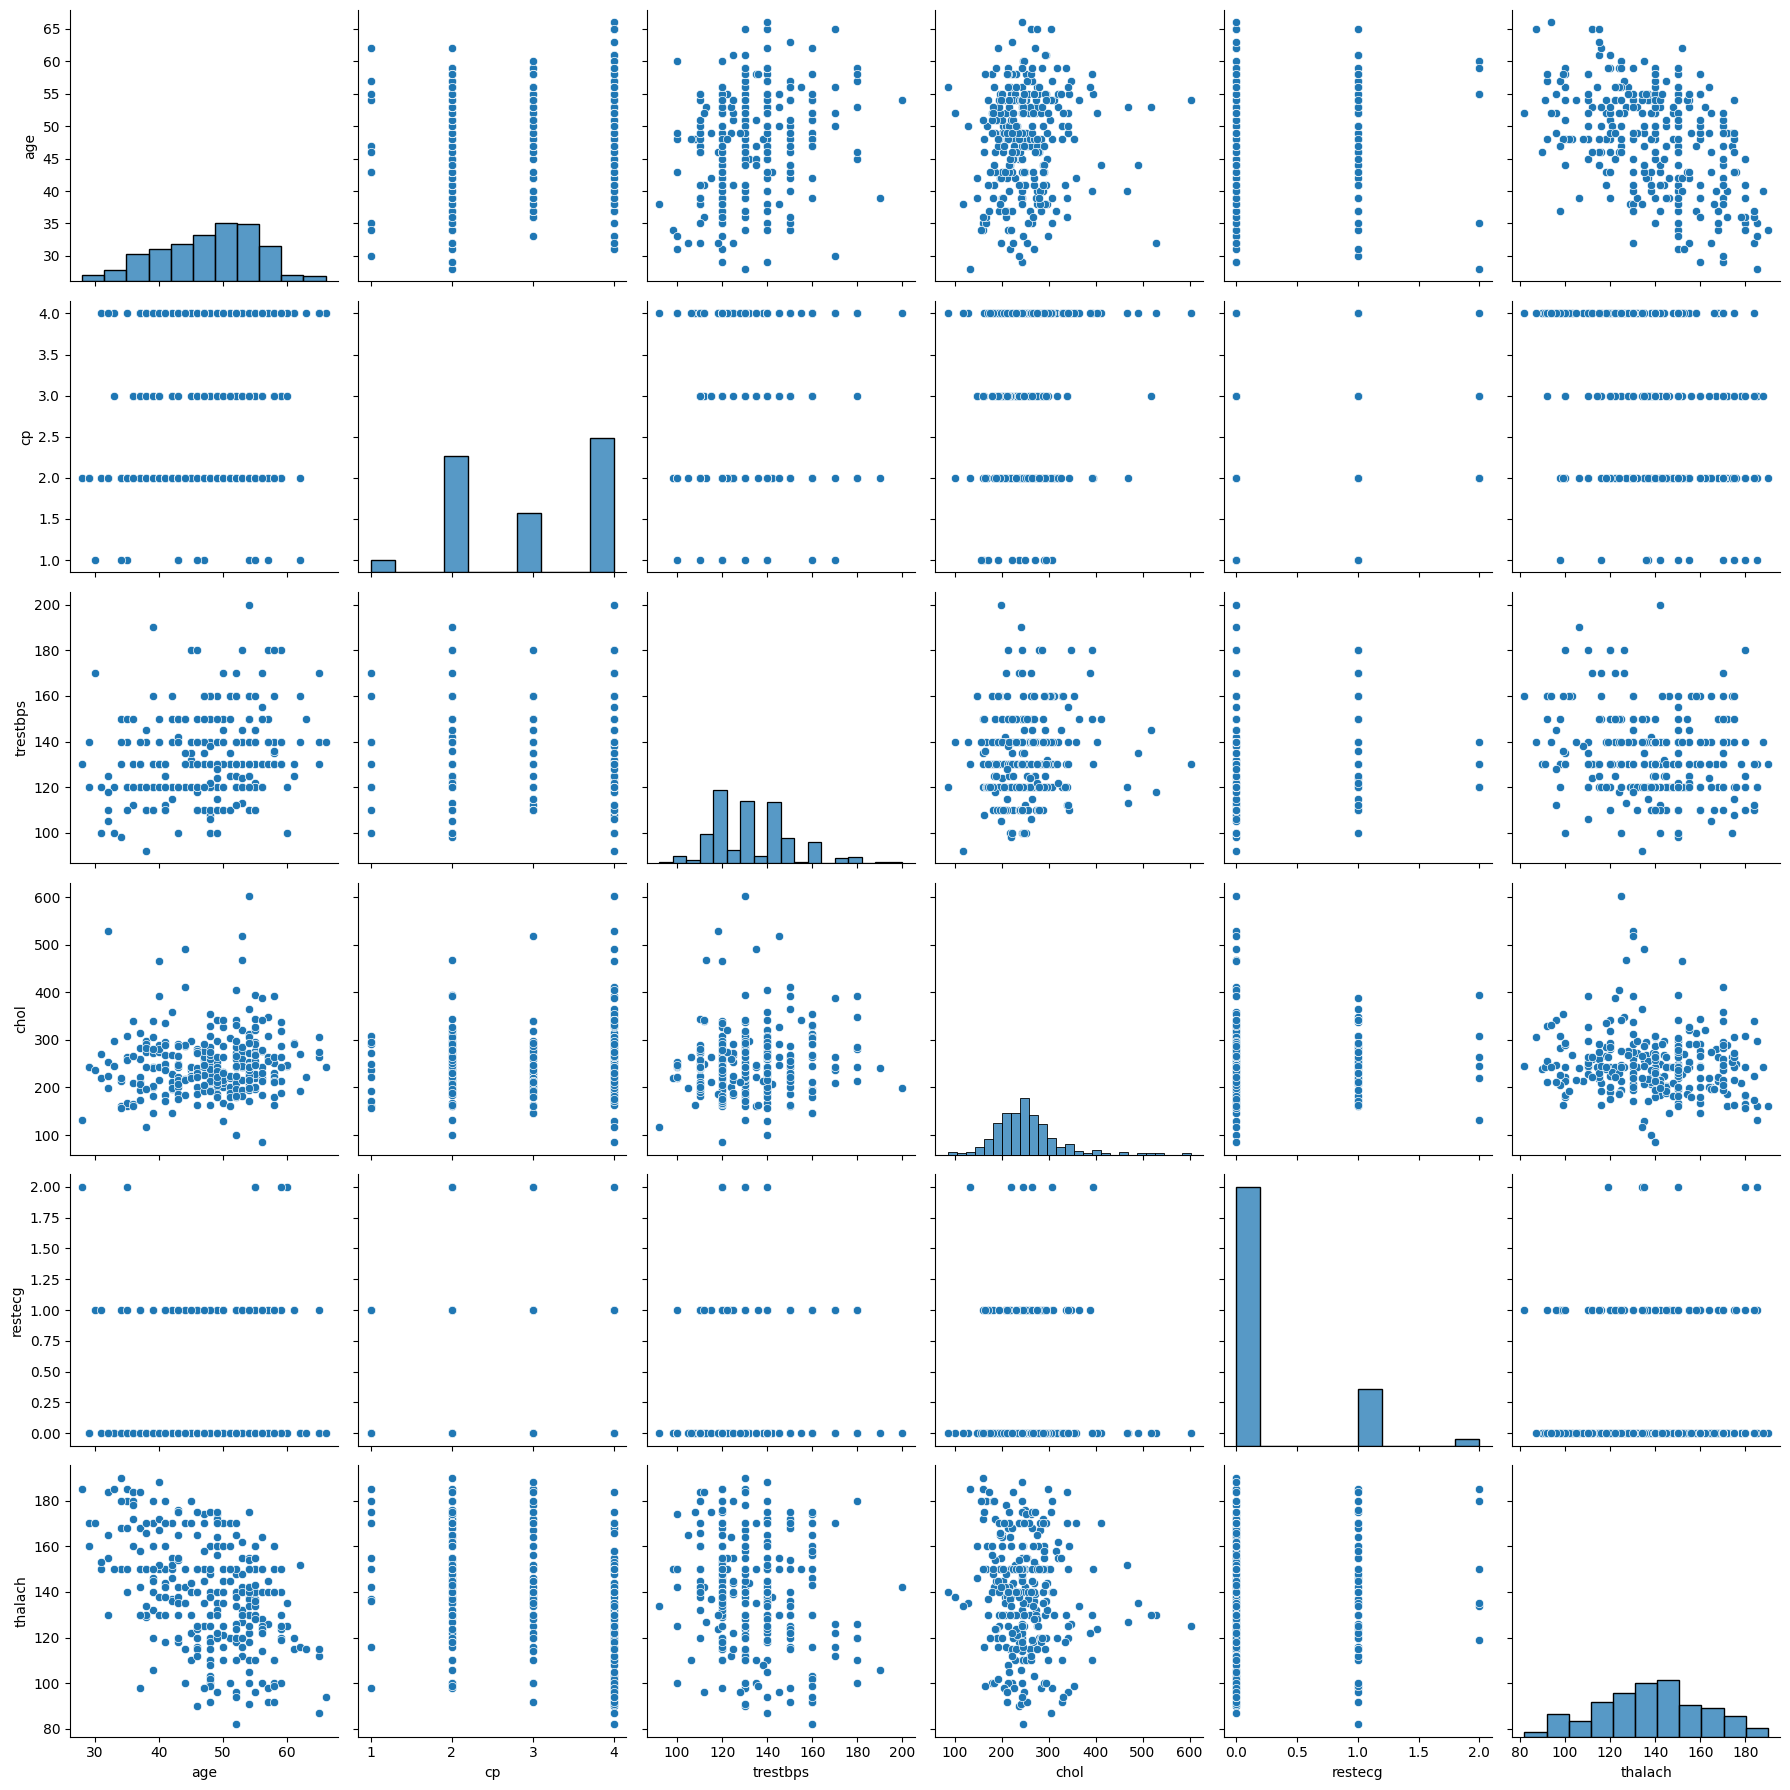

In [ ]:
sns.pairplot(df, height=3) #By default, this function will create a grid of Axes
plt.tight_layout()         # such that each numeric variable in data will by
                           #shared across the y-axes across a single row and
                           #the x-axes across a single column.


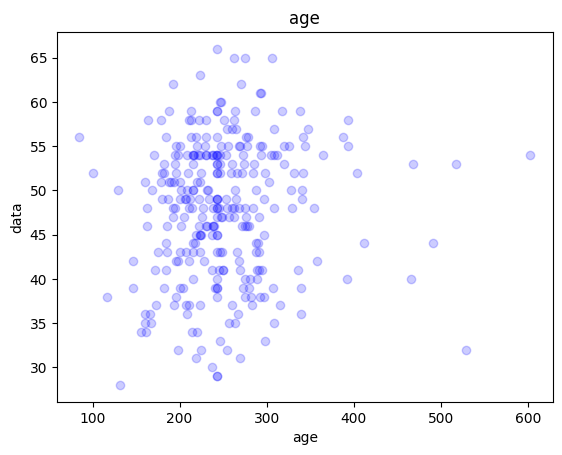

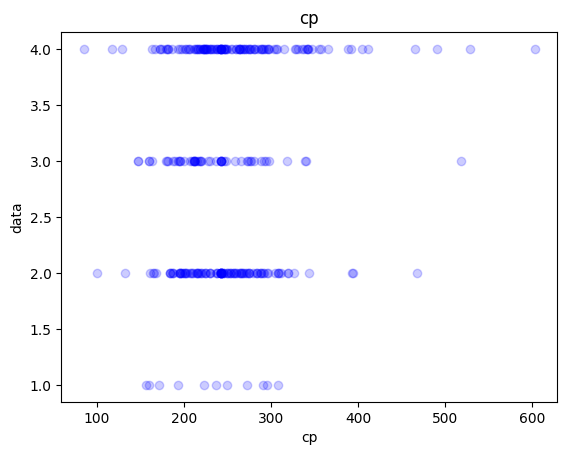

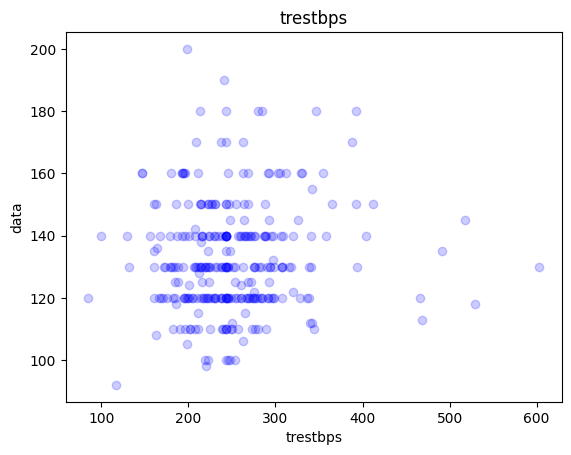

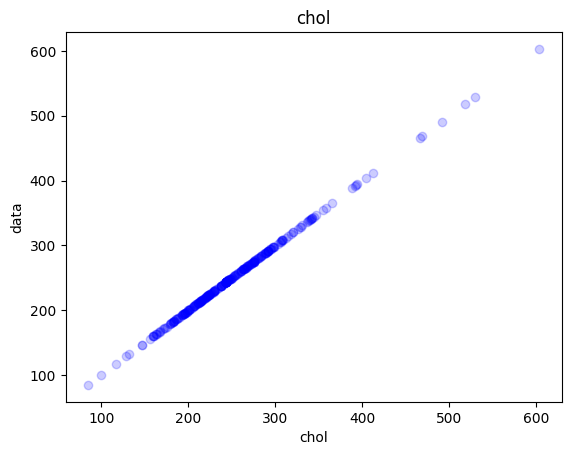

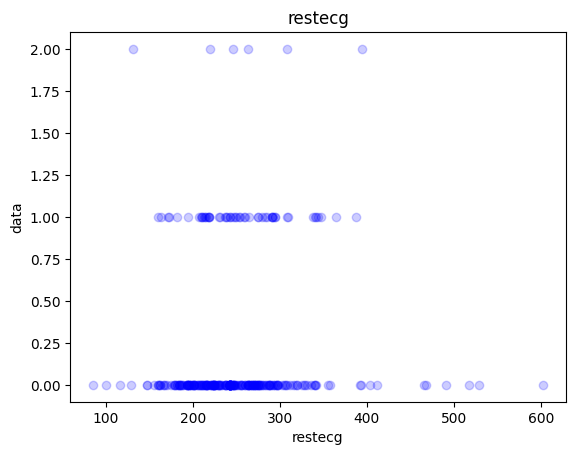

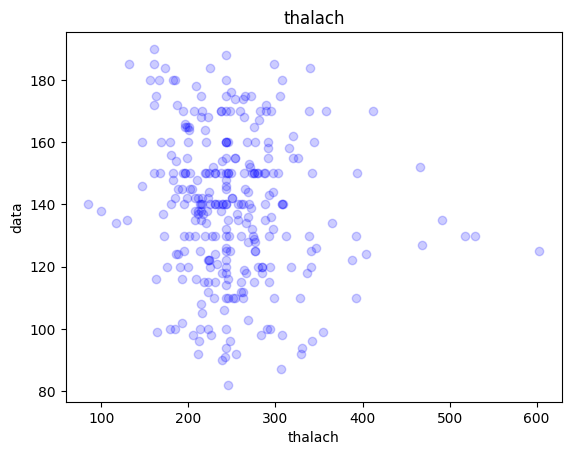

In [ ]:
for i in df.columns[:]:
  plt.scatter(df["chol"], df[i], alpha=0.2, c='blue' )
  plt.xlabel(i)
  plt.ylabel("data")
  plt.title(i)
  plt.show()#dont forget this, as the machine will try to print everything in one graph

**SKEWNESS AND KURTOSIS**

*Skewness* is the degree of asymmetry observed in a probability distribution. Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees. A normal distribution (bell curve) exhibits zero skewness. [***](https://www.investopedia.com/terms/s/skewness.asp#:~:text=Skewness%20is%20the%20degree%20of,bell%20curve%20exhibits%20zero%20skewness.)

*Kurtosis* is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution. [***](https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,thin%20tails%20are%20platykurtic.)

<ipython-input-26-51017d3c567a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])#prints the distribution data plot of age


skewnees: 1.518362
kurtosis 5.255417


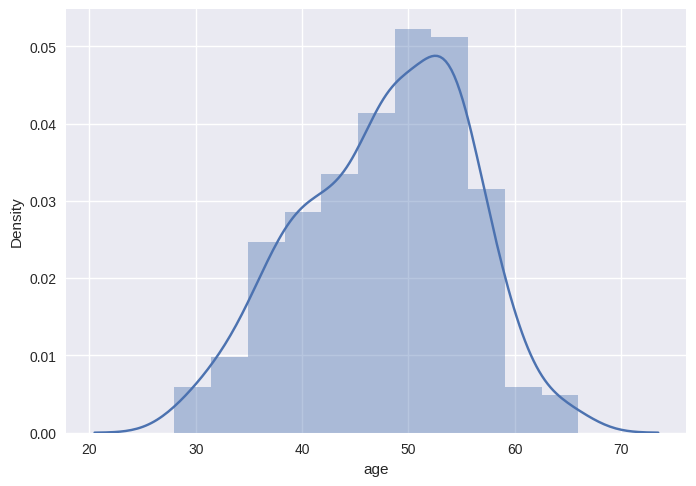

In [ ]:
plt.style.use('seaborn-v0_8')
sns.distplot(df['age'])#prints the distribution data plot of age
print("skewnees: %f" % df['chol'].skew()) #Skewed data is data that creates an
                                          #asymmetrical, skewed curve on a graph
print("kurtosis %f" % df['chol'].kurt())

<ipython-input-27-41b2dce5c95e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], fit= norm) #shows the normal distribution


From the given normalized diagram it is clear that we need to transform this data a little bit to fit it in the model

 mu= 250.235 and sigma= 64.872

[-0.28280887 -0.2170568   0.73714658  1.5106047   1.97881249 -0.08699816]


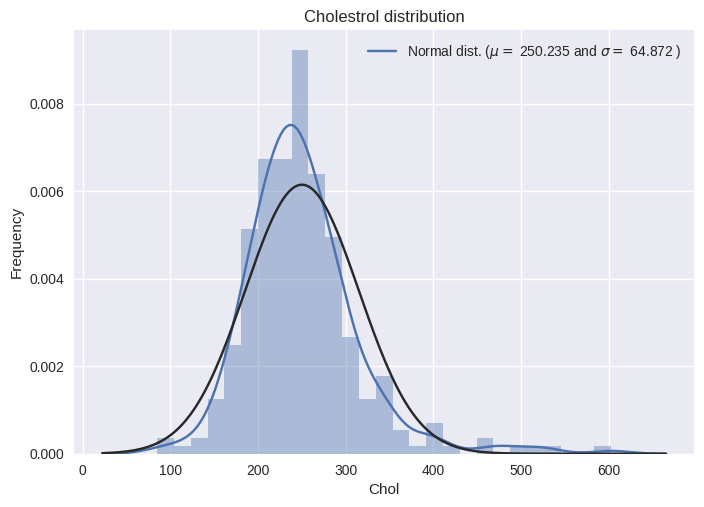

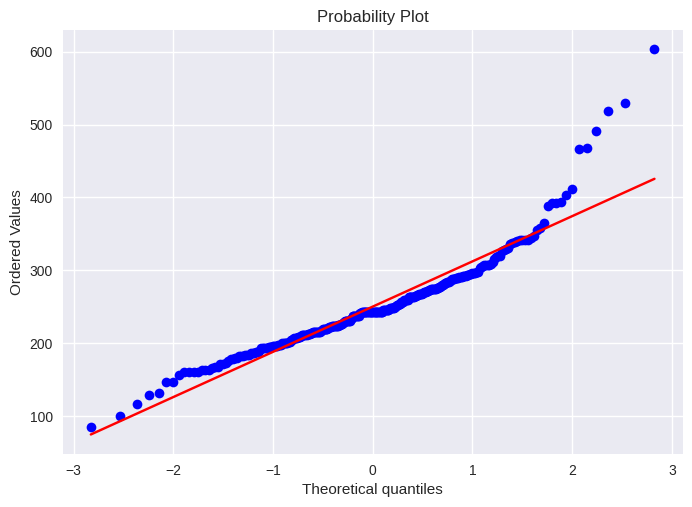

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(df['chol'], fit= norm) #shows the normal distribution
print('From the given normalized diagram it is clear that we need to transform this data a little bit to fit it in the model')

(m, sig) = norm.fit(df['chol'])
print('\n mu= {:.3f} and sigma= {:.3f}\n'.format(m, sig))

plt.ylabel('Frequency')
plt.xlabel('Chol')
plt.legend(['Normal dist. ($\mu=$ {:.3f} and $\sigma=$ {:.3f} )'.format(m,sig)],
            loc='best')
plt.title('Cholestrol distribution')
print(stats.skew(df))
#QQ plot
fig = plt.figure()
res = stats.probplot(df['chol'], plot = plt)
plt.show()

**CORRELATION**

<Axes: >

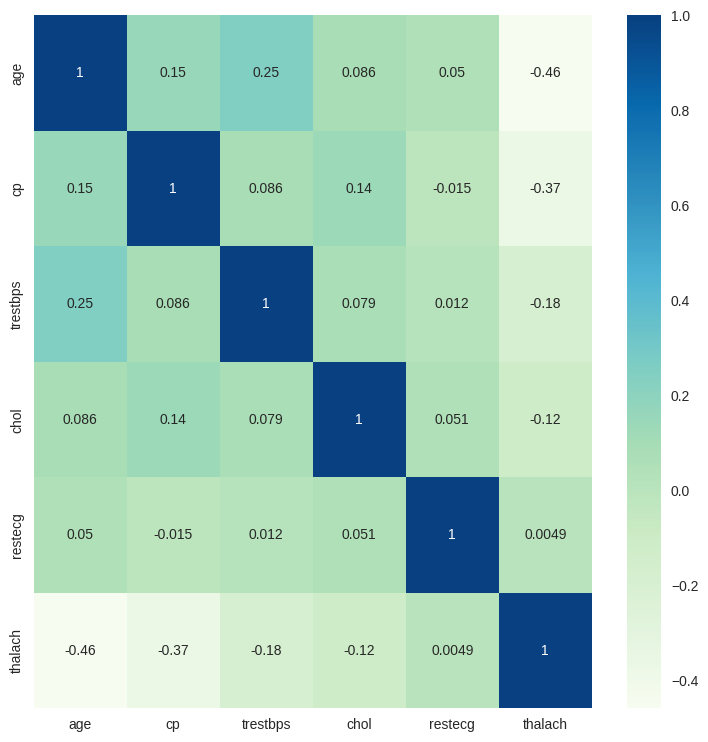

In [ ]:
plt.figure(figsize=(9,9))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.GnBu)

0.4923187868565441

 mu= 250.235 and sigma= 64.872



<ipython-input-29-83184060dbff>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["chol"], fit= norm)


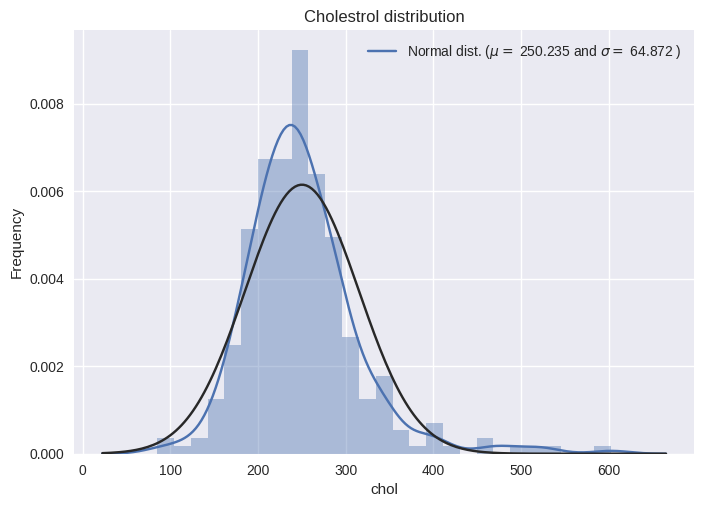

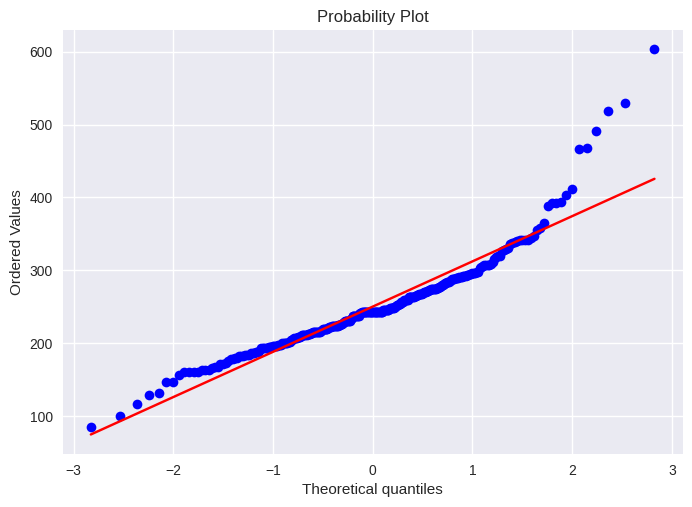

In [ ]:
#to make it a bit more accurate we will use the PowerTrasnformer

new_df = np.cbrt((df["chol"]))
print(stats.skew(new_df))
#prev skew: 1.135503
#new skew: 0.3849088184080977

sns.distplot(df["chol"], fit= norm)

(m, sig) = norm.fit(df['chol'])
print('\n mu= {:.3f} and sigma= {:.3f}\n'.format(m, sig))

plt.ylabel('Frequency')
plt.xlabel('chol')
plt.legend(['Normal dist. ($\mu=$ {:.3f} and $\sigma=$ {:.3f} )'.format(m,sig)],
            loc='best')
plt.title('Cholestrol distribution')

#QQ plot
fig = plt.figure()
res = stats.probplot(df['chol'], plot = plt)
plt.show()

**MODEL BUILDING**

I am using linear regression from sklearn as the model

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop("chol", axis=1)
y = df["chol"]
x_test,x_train,y_test,y_train = train_test_split(x,y)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(x_train,y_train)
y_test = y_test.reshape(1,-1)
#predictions
predictions = lr.predict(x_test)
print("Absolute value: ", y_test)
print("Model prediction value: ", predictions)

#error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Error is: ", rmse)